# Mahdi Abdollahpour (mahdi.abdollahpour@unibo.it)
# 2025

In [1]:
# import relevant packages
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # suppress tf warnings

gpu_num = 0 # Number of the GPU to be used
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

import sys
sys.path.append('../') # to access all relevant repo files

%load_ext autoreload
%autoreload 2

from utils import E2E_Model, Parameters, load_weights, plot_results, sample_along_trajectory, serialize_example
import numpy as np

import sionna
from sionna.rt import load_scene, Transmitter, Receiver, PlanarArray, Camera
from sionna.nr import CarrierConfig
from sionna.utils import split_dim
print("done!")

Number of GPUs available : 1
Only GPU number 0 used.
done!


# BenchMarck Board num PRBs: 22
Var MCS 4x2 DoubleTDL mcs_index=9, 14, 19

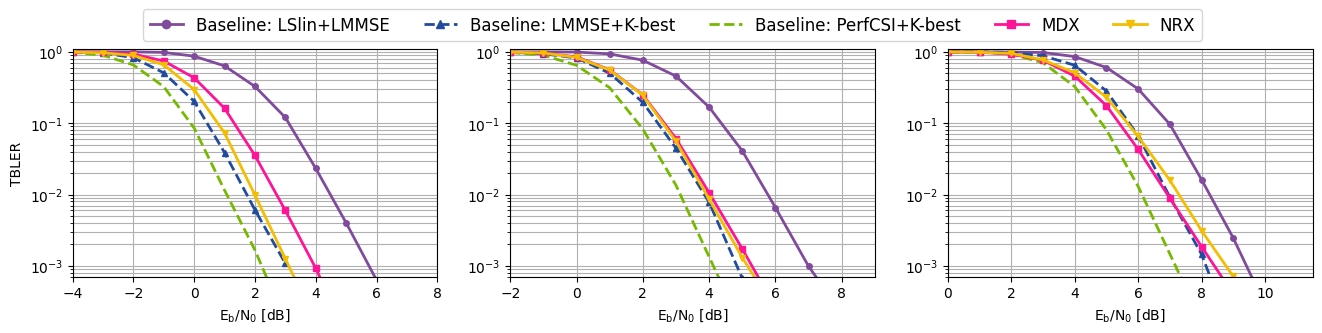

In [57]:
# Var MCS 4x2 DoubleTDL mcs_index=9, 14, 19

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import os

current_directory = f"{os.getcwd()}/"

num_tx_eval = 2 # depends on what has been evaluated in evaluate.py before
mcs_idx = 0
xlim_ = [[-4,4],[-2,5],[0,7]]
ylim_ = [[7e-4,2.3e-1],[7e-4,1.8e-1],[7e-4,1.6e-1]]
show_ber = True

xlim_ = [[-4,5.3],[-2,6.3],[0,8.4]]
ylim_ = [[4e-5,2.3e-1],[4e-5,1.8e-1],[4e-5,1.6e-1]]
show_ber = True

xlim_ = [[-4,8],[-2,9],[0,11.5]]
ylim_ = [[7e-4,1.1e0]]*3
show_ber = False


# style, color, marker, marker size * v
style_lslin = ["-",2,'o',4]
style_lmmse = ["--",4,'^',4]
style_perf  = ["--",0,'',4]
style_mdx   = ["-",8,'s',4]
style_nrx_large = ["-",1,'v',4]



label_lslin = "Baseline: LSlin+LMMSE"
label_lmmse = "Baseline: LMMSE+K-best"
label_perf  = "Baseline: PerfCSI+K-best"
label_mdx   = "MDX"
label_nrx_large = "NRX"
COLORMAP = ['#76B900', '#F3BD00','#814B9D','#5C5C5C','#214B9D', '#e48aa7', '#7c4848', '#78A2EB', '#ff1397', '#bee7dd']



fig_, axes = plt.subplots(1, 3, figsize=(16, 12))


for mcs_i in range(3): # MCS index

        ax = axes[mcs_i]
        fig = None

        show_title = show_x_label = show_y_label = show_legend = show_x_ticks = show_y_ticks = False
        if mcs_i==0:
            show_y_label = True

        show_x_label = True
        show = [show_title, show_x_label, show_y_label, show_legend, show_x_ticks, show_y_ticks]

        num_tx_eval = 2
        mcs_idx = mcs_i



        xlim = xlim_[mcs_i]
        ylim = ylim_[mcs_i]
    
        # --------- LS
        if mcs_idx !=2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=[ "-Baseline: LMMSE+K-best", f"{label_lslin}","-Baseline: PerfCSI+K-best"],results_dir=results_dir,
                            line_styles=[style_lmmse,style_lslin,"--","--","--","--","-"], axis=ax, show=show)
        if mcs_idx ==2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=[ f"{label_lslin}","-Baseline: PerfCSI+K-best", "-Baseline: LMMSE+K-best"],results_dir=results_dir,
                            line_styles=[style_lslin,"--","--","--","--","-"], axis=ax, show=show)


        # --------- Baseline: LMMSE+K-best
        if mcs_idx !=2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=[ label_lmmse,"-Baseline: LSlin+LMMSE","-Baseline: PerfCSI+K-best",label_lmmse],results_dir=results_dir,
                            line_styles=[style_lmmse,style_lslin,style_perf,"--","--","-"], axis=ax, show=show)
        if mcs_idx ==2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=["-Baseline: LSlin+LMMSE","-Baseline: PerfCSI+K-best",label_lmmse],results_dir=results_dir,
                            line_styles=[style_lslin,style_perf,style_lmmse,"--","--","-"], axis=ax, show=show)
        # ---------- Baseline: PerfCSI+K-best
        if mcs_idx !=2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=[ "-Baseline: LMMSE+K-best","-Baseline: LSlin+LMMSE",label_perf],results_dir=results_dir,
                            line_styles=[style_lmmse,style_lslin,style_perf,"--","--","-"], axis=ax, show=show)
        if mcs_idx ==2:
            config_name = "baselines_4x2.cfg" 
            results_dir=[current_directory, "_tdla"]
            fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                            labels=[ "-Baseline: LSlin+LMMSE",label_perf,"-Baseline: LMMSE+K-best",],results_dir=results_dir,
                            line_styles=[style_lslin,style_perf,style_lmmse,"--","--","-"], axis=ax, show=show)

        # # ---------- MDX
        config_name = "mdx_res_blocks2_var_mcs_it1_ext.cfg"
        results_dir=[current_directory, "_tdla"]
        fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                        color_offset=4,results_dir=results_dir,
                        labels=[label_mdx], line_styles=[style_mdx], axis=ax, show=show);
        
        # ---------- NRX
        config_name = "nrx_large_var_mcs_64qam_masking.cfg" # NRX:large var-mcs
        results_dir=[current_directory, "_tdla"]
        fig = plot_results(fig=fig,config_name=config_name, num_tx_eval=num_tx_eval, xlim=xlim, ylim=ylim,mcs_arr_eval_idx=mcs_idx,show_ber=show_ber,
                        color_offset=0,results_dir=results_dir,
                        labels=[label_nrx_large],
                        line_styles=[style_nrx_large], axis=ax, show=show);





# Create legend elements
lw=2
legend_elements = [
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_lslin[1]], linestyle=style_lslin[0], marker=style_lslin[2], label=label_lslin),   # LS
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_lmmse[1]], linestyle=style_lmmse[0], marker=style_lmmse[2], label=label_lmmse),   # LMMSE
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_perf[1]], linestyle=style_perf[0], marker=style_perf[2], label=label_perf),      # Perf
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_mdx[1]], linestyle=style_mdx[0], marker=style_mdx[2], label=label_mdx),         # MDX     
    Line2D([0], [0], linewidth=lw, color=COLORMAP[style_nrx_large[1]], linestyle=style_nrx_large[0], marker=style_nrx_large[2], label=label_nrx_large),# NRX large
]


fig_.legend(handles=legend_elements, loc='lower center', bbox_to_anchor=(0.5, 0.3), ncol=5,fontsize=12)

# fig_.text(0.5, 0.41, f"MIMO 4x2 TDL A Channel, 273PRBs", fontsize=16, ha='center', va='top')

fig_.subplots_adjust(top=.3)


ber_str = "ber"
if not show_ber:
    ber_str = "bler"
fig_.savefig(f"{ber_str}_4x2_tdla.png", dpi=300, bbox_inches="tight",transparent=True)
# fig_.savefig(f"{ber_str}_4x2_tdla.pdf", dpi=300, bbox_inches="tight", format="pdf", facecolor='white', transparent=True)